In [1]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/noarch         [>                   ] (--:--) No change
pkgs/main/noarch

In [90]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [91]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [92]:
Tesla = yf.Ticker("TSLA")
tesla_data  = Tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [93]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [94]:
soup = BeautifulSoup(html_data, 'html5lib')

In [95]:
tesla_revenue_html = pd.read_html(str(soup))
tesla_revenue = tesla_revenue_html[1]

In [96]:
tesla_revenue= tesla_revenue.rename(columns={'Tesla Quarterly Revenue(Millions of US $)':'Date','Tesla Quarterly Revenue(Millions of US $).1':'Revenue'})

In [97]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [98]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [99]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [100]:
GameStop = yf.Ticker("GME")
gme_data = GameStop.history(period='max')
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [53]:
url ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [55]:
soup = BeautifulSoup(html_data, 'html5lib')

In [67]:
gme_revenue_html = pd.read_html(str(soup))
gme_revenue = gme_revenue_html[1]
gme_revenue = gme_revenue.rename(columns={'GameStop Quarterly Revenue(Millions of US $)':'Date','GameStop Quarterly Revenue(Millions of US $).1':'Revenue'})

In [68]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$','')

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [69]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


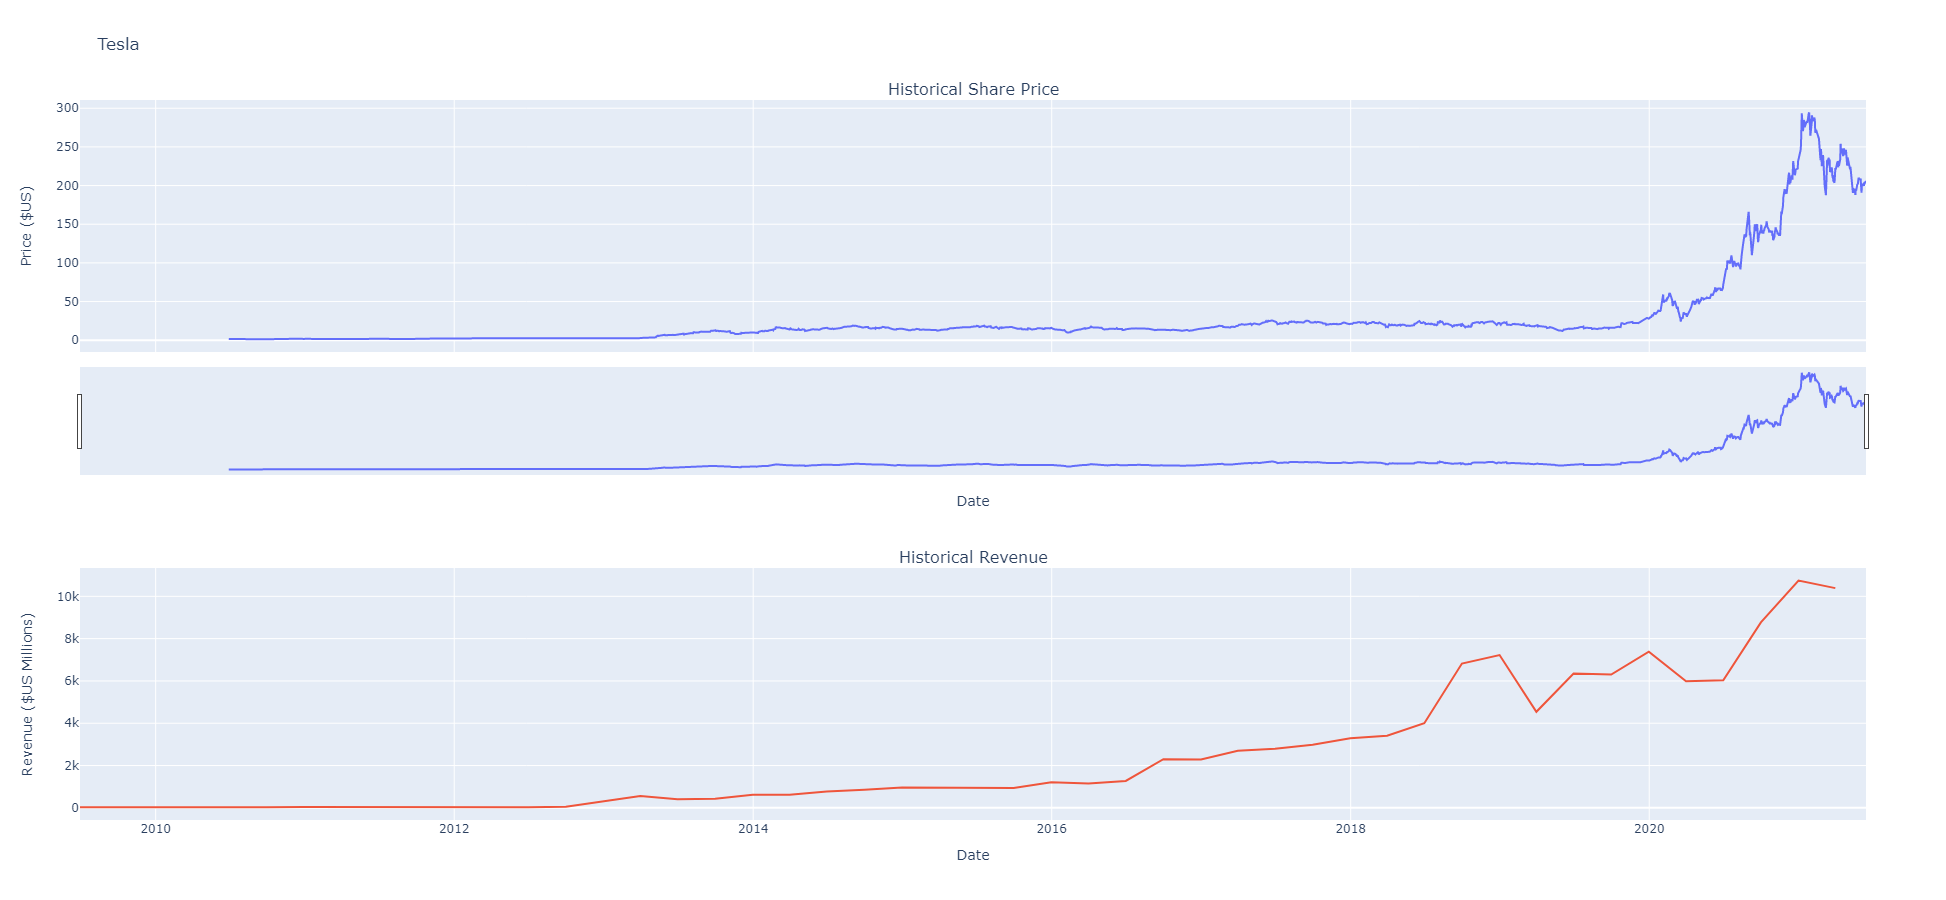

In [89]:
make_graph(tesla_data,tesla_revenue, 'Tesla')

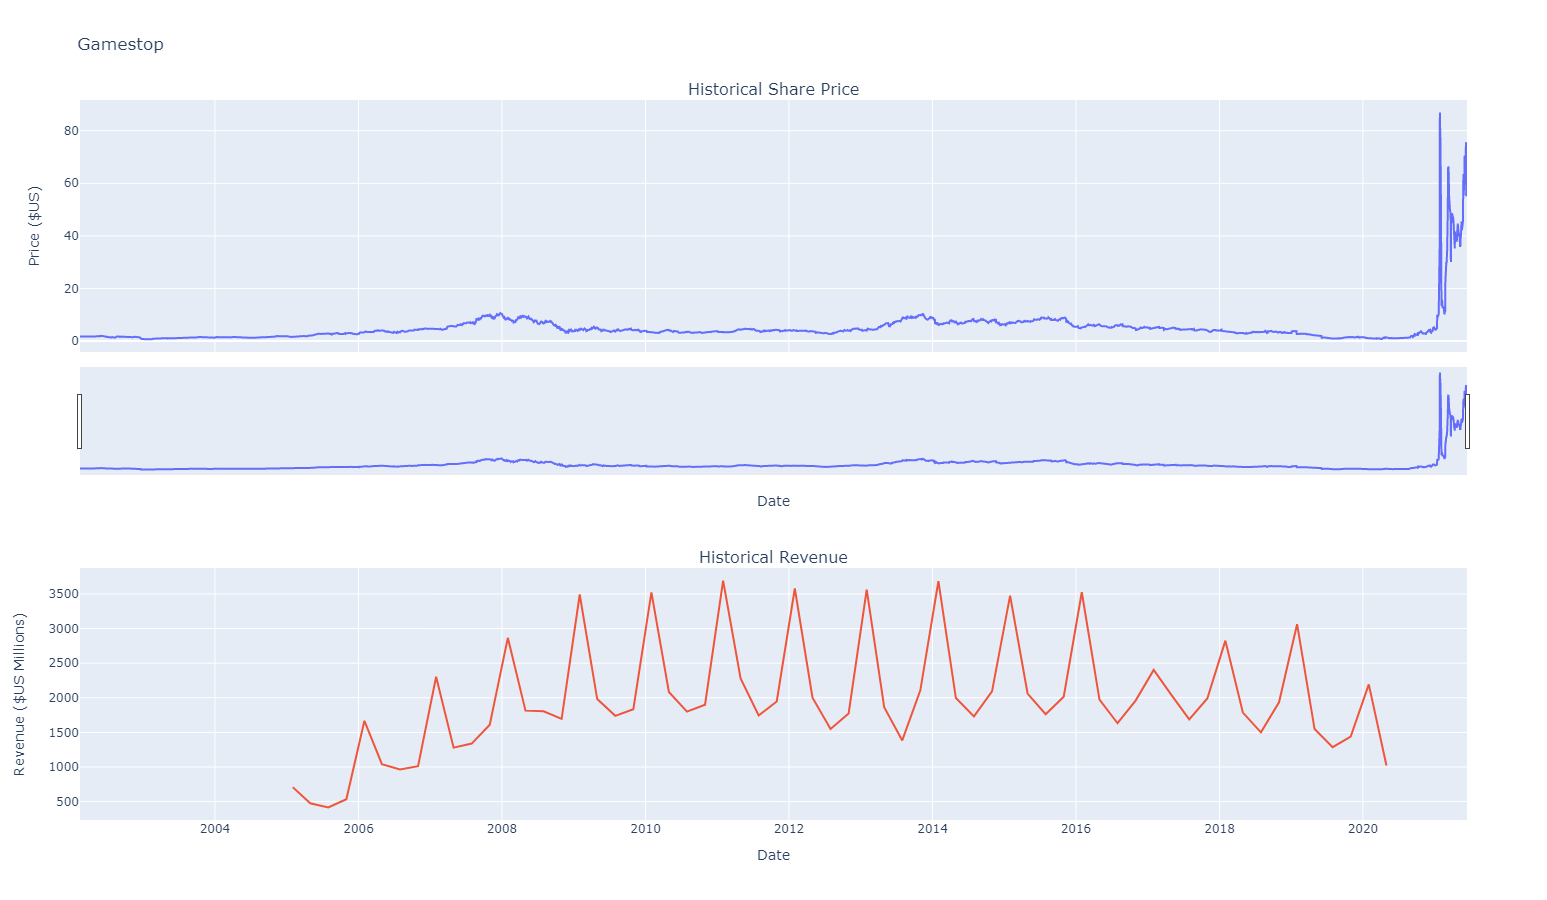

In [101]:
make_graph(gme_data,gme_revenue, 'Gamestop')